In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prophet import Prophet

from src.utils import init_notebook

In [2]:
init_notebook()

## Prophet

### Pré-traitement pour Prophet

In [3]:
# relecture des données (sans detrend)
data_folder = "data/raw"
stock_name = "AAPL"
df = pd.read_csv(
    f"{data_folder}/{stock_name}.csv", parse_dates=["Date"], index_col="Date"
)
print(f"{df.shape = }")

df.shape = (756, 6)


In [4]:
train_start_date = "2019"
train_end_date = "2021-10-01"
df_train = df.loc[train_start_date:train_end_date].copy()
df_test = df.loc[train_end_date:].copy()

In [5]:
df_train["time_dummy"] = range(len(df_train))
df_test["time_dummy"] = range(len(df_test))
df_test["time_dummy"] += len(df_train)
df_train["day"] = df_train.index.day
df_test["day"] = df_test.index.day

In [6]:
df_train.shape

(694, 8)

In [7]:
x = df_train[[]].copy()

In [8]:
x_col = ["time_dummy", "day"]
y_col = ["Close"]

In [9]:
x["ds"] = df_train.index
x["y"] = df_train[["Close"]]

In [10]:
df_test.head()

,Open,High,Low,Close,Adj Close,Volume,time_dummy,day
Date,,,,,,,,
2021-10-01,141.899994,142.919998,139.110001,142.649994,141.018539,94639600,694,1
2021-10-04,141.759995,142.210007,138.270004,139.139999,137.548676,98322000,695,4
2021-10-05,139.490005,142.240005,139.360001,141.110001,139.496140,80861100,696,5
2021-10-06,139.470001,142.149994,138.369995,142.000000,140.375946,83221100,697,6
2021-10-07,143.059998,144.220001,142.720001,143.289993,141.651215,61732700,698,7


In [11]:
x_test = df_test[x_col]
y_test = df_test[y_col]

In [12]:
x.head()

,ds,y
Date,,
2019-01-02,2019-01-02,39.480000
2019-01-03,2019-01-03,35.547501
2019-01-04,2019-01-04,37.064999
2019-01-07,2019-01-07,36.982498
2019-01-08,2019-01-08,37.687500


### Prédiction

#### Calcul de la prédiction

In [13]:
model = Prophet()
model.fit(x)

16:17:32 - cmdstanpy - INFO - Chain [1] start processing
16:17:33 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = x_test.copy()
future["ds"] = x_test.index

In [15]:
forecast = model.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
58,2021-12-23,164.084319,158.016505,170.857023
59,2021-12-27,165.483298,159.591354,172.562731
60,2021-12-28,165.809740,159.376043,172.886401
61,2021-12-29,166.157137,160.073954,173.173557
62,2021-12-30,166.183145,160.306439,173.640312


#### Affichage de la prédiction

C:\Users\AB2-PC\Documents\GitHub\ab2\stock-analysis\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


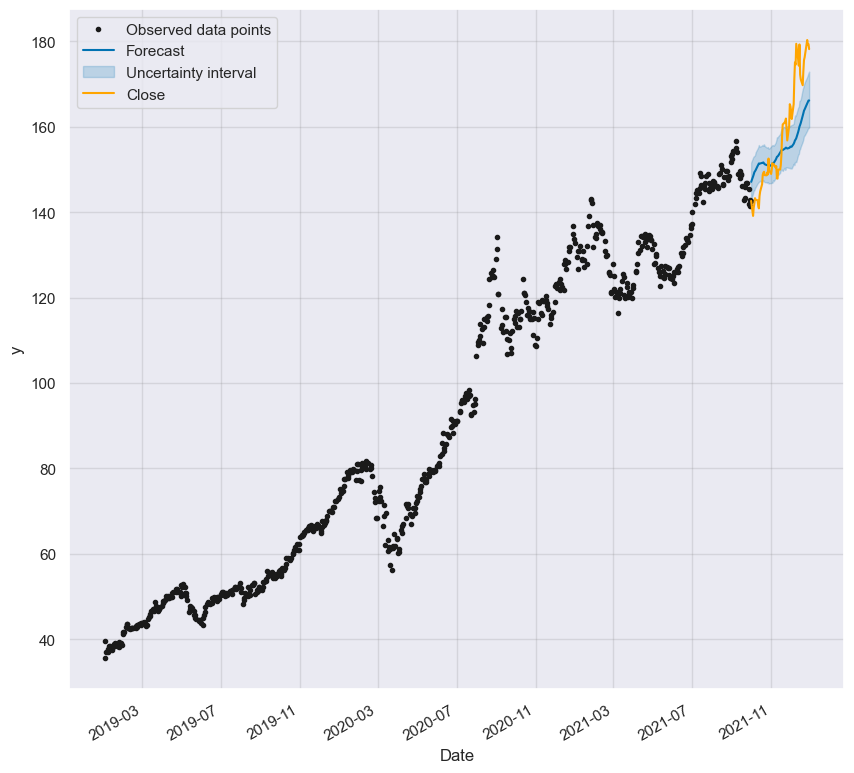

In [47]:
fig, ax1 = plt.subplots(figsize=(10, 10))
fig1 = model.plot(forecast, ax=ax1)
df[["Close"]].loc[train_end_date:].plot(ax=ax1, color="orange")
plt.legend()

In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-01,151.058910,142.951002,151.604091,151.058910,151.058910,-3.950291,-3.950291,-3.950291,-2.344759,-2.344759,-2.344759,-1.605532,-1.605532,-1.605532,0.0,0.0,0.0,147.108620
1,2021-10-04,151.345587,144.421667,152.793188,151.345587,151.345587,-2.979305,-2.979305,-2.979305,-2.286624,-2.286624,-2.286624,-0.692681,-0.692681,-0.692681,0.0,0.0,0.0,148.366283
2,2021-10-05,151.441146,145.084010,153.073941,151.441146,151.441146,-2.599713,-2.599713,-2.599713,-2.218994,-2.218994,-2.218994,-0.380719,-0.380719,-0.380719,0.0,0.0,0.0,148.841433
3,2021-10-06,151.536705,145.112031,153.162099,151.536705,151.536705,-2.166635,-2.166635,-2.166635,-2.088997,-2.088997,-2.088997,-0.077637,-0.077637,-0.077637,0.0,0.0,0.0,149.370071
4,2021-10-07,151.632264,145.648249,153.346119,151.632264,151.632264,-2.030886,-2.030886,-2.030886,-2.240438,-2.240438,-2.240438,0.209552,0.209552,0.209552,0.0,0.0,0.0,149.601379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2021-12-23,158.990310,157.965905,170.341980,154.465431,163.564362,5.094009,5.094009,5.094009,-2.240438,-2.240438,-2.240438,7.334447,7.334447,7.334447,0.0,0.0,0.0,164.084319
59,2021-12-27,159.372546,159.145845,171.705504,154.739954,164.092772,6.110753,6.110753,6.110753,-2.286624,-2.286624,-2.286624,8.397377,8.397377,8.397377,0.0,0.0,0.0,165.483298
60,2021-12-28,159.468105,159.537970,172.142187,154.661814,164.278814,6.341635,6.341635,6.341635,-2.218994,-2.218994,-2.218994,8.560629,8.560629,8.560629,0.0,0.0,0.0,165.809740
61,2021-12-29,159.563664,159.675974,172.614857,154.603302,164.474350,6.593474,6.593474,6.593474,-2.088997,-2.088997,-2.088997,8.682471,8.682471,8.682471,0.0,0.0,0.0,166.157137


# Prophet manual plot

In [19]:
future

,time_dummy,day,ds
Date,,,
2021-10-01,694,1,2021-10-01
2021-10-04,695,4,2021-10-04
2021-10-05,696,5,2021-10-05
2021-10-06,697,6,2021-10-06
2021-10-07,698,7,2021-10-07
...,...,...,...
2021-12-23,752,23,2021-12-23
2021-12-27,753,27,2021-12-27
2021-12-28,754,28,2021-12-28


C:\Users\AB2-PC\Documents\GitHub\ab2\stock-analysis\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


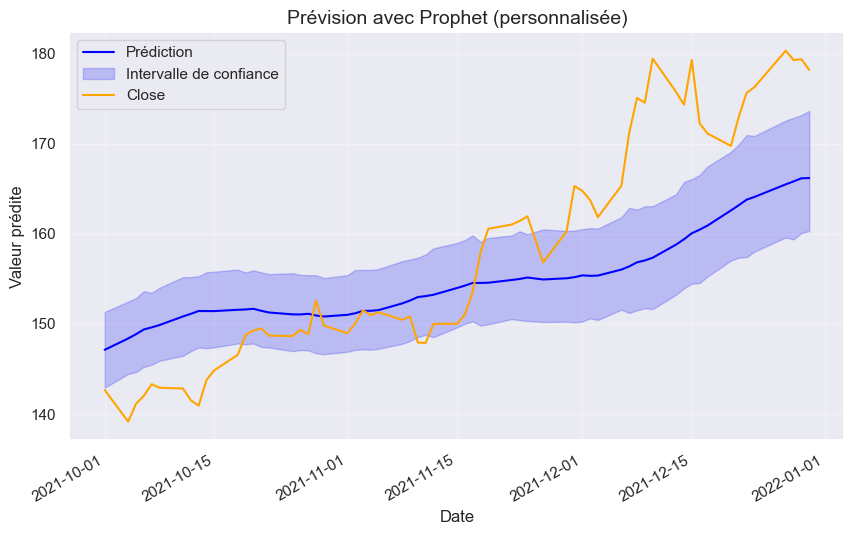

In [21]:
import matplotlib.pyplot as plt

# Suppose que 'df' contient les données historiques et 'forecast' les prédictions
fig, ax = plt.subplots(figsize=(10, 6))

# # 1️⃣ Données réelles
# ax.plot(future['ds'], future['Close'], 'k.', label='Observations', alpha=0.6)

# 2️⃣ Prédictions
ax.plot(forecast["ds"], forecast["yhat"], color="blue", label="Prédiction")

# 3️⃣ Intervalle de confiance
ax.fill_between(
    forecast["ds"],
    forecast["yhat_lower"],
    forecast["yhat_upper"],
    color="blue",
    alpha=0.2,
    label="Intervalle de confiance",
)

# 4️⃣ Options esthétiques
ax.set_title("Prévision avec Prophet (personnalisée)", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Valeur prédite")
ax.legend()
ax.grid(True, alpha=0.3)


df[["Close"]].loc[train_end_date:].plot(ax=ax, color="orange")

plt.show()

# Animation (working but not satisfying)

In [71]:
y = df["Close"].loc[train_end_date:]
future_x = forecast["ds"]

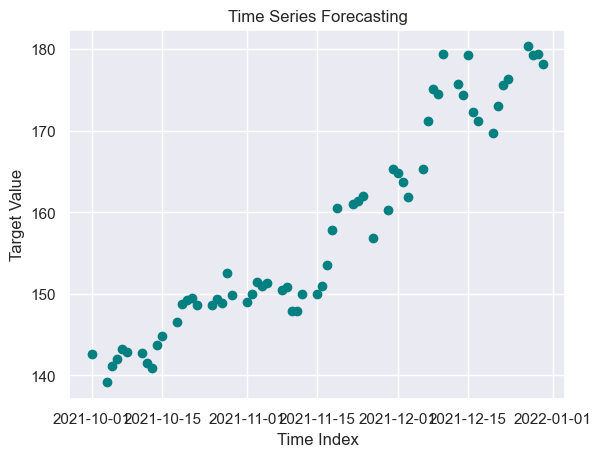

In [74]:
fig, ax = plt.subplots()
ax.set_title("Time Series Forecasting")
ax.set_xlabel("Time Index")
ax.set_ylabel("Target Value")
ax.scatter(future_x, y, color="teal")

(line,) = ax.plot([], [], color="navy")

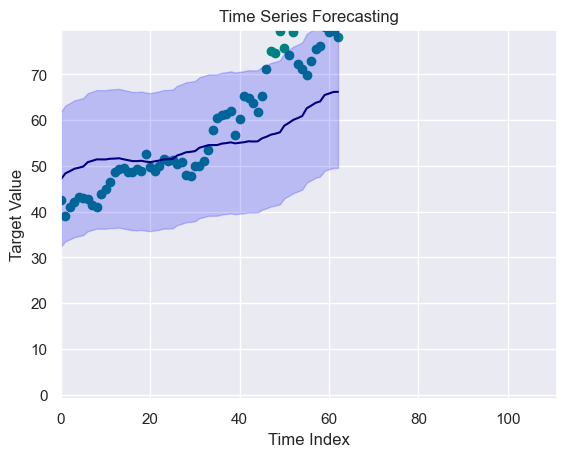

In [83]:
beginning_x = ""
beginning_y = df["Close"].loc[train_end_date:]

y = df["Close"].loc[train_end_date:] - 100
future_x = range(len(y))  # forecast["ds"]
future_mean = forecast["yhat"] - 100
future_std = forecast["yhat"] * 0.1

# Création de la figure
fig, ax = plt.subplots()
ax.set_title("Time Series Forecasting")
ax.set_xlabel("Time Index")
ax.set_ylabel("Target Value")
ax.scatter(future_x, y, color="teal")

(line,) = ax.plot([], [], color="navy")
fill = None

# Limites initiales
# ax.set_xlim(0, 25)
# ax.set_ylim(-1, 1.5)


def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    global fill
    if fill:
        fill.remove()

    x_data = future_x[:i]
    y_mean = future_mean[:i]
    y_std = future_std[:i]

    line.set_data(x_data, y_mean)

    if len(x_data) > 0:
        fill = ax.fill_between(
            x_data, y_mean - y_std, y_mean + y_std, color="blue", alpha=0.2
        )
        target_xmax = 25 + i * 1.5
        target_ymax = max(1.5, np.max(y_mean + y_std) + 0.2)
    else:
        target_xmax = 25
        target_ymax = 1.5

    # --- Zoom fluide (effet easing) ---
    current_xlim = ax.get_xlim()
    current_ylim = ax.get_ylim()
    smooth_xmax = current_xlim[1] + 0.15 * (target_xmax - current_xlim[1])
    smooth_ymax = current_ylim[1] + 0.15 * (target_ymax - current_ylim[1])
    ax.set_xlim(0, smooth_xmax)
    ax.set_ylim(-1, smooth_ymax)
    # -----------------------------------

    return line, fill if fill else line


ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(future_x) + 1, interval=200, blit=False
)

ani.save("prophet.gif", writer="pillow", fps=15)
plt.show()

# Improve animation

In [91]:
len(y)

63

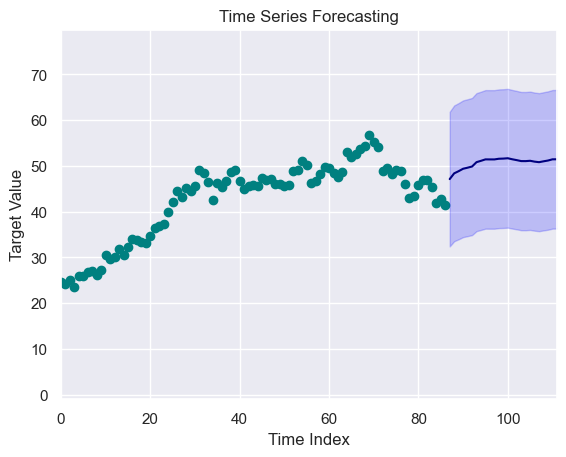

In [92]:
TEMP_OFFSET_TO_DELETE = 100
beginning_y = df["Close"][-150:-63] - TEMP_OFFSET_TO_DELETE
beginning_x = range(len(beginning_y))

y = df["Close"].loc[train_end_date:] - TEMP_OFFSET_TO_DELETE
future_x = range(len(beginning_y), len(beginning_y) + len(y))  # forecast["ds"]
future_mean = forecast["yhat"] - TEMP_OFFSET_TO_DELETE
future_std = forecast["yhat"] * 0.1

# Création de la figure
fig, ax = plt.subplots()
ax.set_title("Time Series Forecasting")
ax.set_xlabel("Time Index")
ax.set_ylabel("Target Value")
ax.scatter(beginning_x, beginning_y, color="teal")

(line,) = ax.plot([], [], color="navy")
fill = None

# Limites initiales
# ax.set_xlim(0, 25)
# ax.set_ylim(-1, 1.5)


def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    global fill
    if fill:
        fill.remove()

    x_data = future_x[:i]
    y_mean = future_mean[:i]
    y_std = future_std[:i]

    line.set_data(x_data, y_mean)

    if len(x_data) > 0:
        fill = ax.fill_between(
            x_data, y_mean - y_std, y_mean + y_std, color="blue", alpha=0.2
        )
        target_xmax = 25 + i * 1.5
        target_ymax = max(1.5, np.max(y_mean + y_std) + 0.2)
    else:
        target_xmax = 25
        target_ymax = 1.5

    # --- Zoom fluide (effet easing) ---
    current_xlim = ax.get_xlim()
    current_ylim = ax.get_ylim()
    smooth_xmax = current_xlim[1] + 0.15 * (target_xmax - current_xlim[1])
    smooth_ymax = current_ylim[1] + 0.15 * (target_ymax - current_ylim[1])
    ax.set_xlim(0, smooth_xmax)
    ax.set_ylim(-1, smooth_ymax)
    # -----------------------------------

    return line, fill if fill else line


ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(future_x) + 1, interval=200, blit=False
)

ani.save("prophet2.gif", writer="pillow", fps=15)
plt.show()